Readme goes here

```bash
# what have been channged?
git status
# add changed files
git add *
# commit
git commit -m "commit log goes here!"
# push
git push
```

```
# install seaborn
pip install seaborn
´´´


# Projekt "Kaufen oder Warten"

Die Situation kennen alle, die ab und zu Flugtickets kaufen: Sollte man besser warten, weil der Preis vielleicht noch fällt, oder sollte man kaufen? Insbesondere bei der Fluggesellschaft, um die es in diesem Projekt geht, sind scheinbar erratische Preisveränderungen bekannt. Die übliche Regel "je früher, desto besser" ist hier oft nicht die beste Empfehlung.

## Datenbeschreibung

Der Datensatz `train_set.csv` enthält Preisanfragen zu bestimmten Zeitpunkten für Flüge. Es werden nur zwei verschiedene Strecken in beiden Richtungen betrachtet: zwischen London Stansted und Berlin Schönefeld sowie zwischen London Stansted und Frankfurt.

Die folgenden Merkmale sind enthalten:

- Request_Date: Datum und Uhrzeit der Preisanfrage
- Flight_Date: Datum des Flugs
- Departure_hour: Gerundete Abflugszeit
- flight_unique_id: Eindeutige ID für den Flug
- route_abb: Abkürzung der Flugroute
- Price_In_Eur: Flugpreis
- min_future_price_in_Eur: Minimaler Flugpreis für die flight_unique_id über alle zukünftigen Request_Dates
- buy: 1 = kaufen, 0 = warten (vorherzusagende Klasse)

Die buy-Klasse wird wie folgt berechnet: if Price_In_Eur - min_future_price_in_Eur <= 0 then 1 else 0

## Aufgabe

Sie sollen ein Modell für eine Kaufempfehlung aus den Daten lernen. Interpretieren Sie ein Zeile in dem Datensatz als eine Preisabfrage, die Sie als Kunde durchführen. Das zu lernende Modell soll Ihnen dann empfehlen, zu dem Preis zu kaufen oder besser zu warten. 

Für den ersten Teil der Arbeit überlegen Sie sich, wie Sie solch ein Modell in der Praxis gestalten und anwenden würden. Versetzen Sie sich dazu in die Lage eines Kunden und/oder in die Lage eines Unternehmens. Was könnte bei letzterem das Geschäftsmodell sein?

Welchen Einfluss haben diese Überlegungen auf das Konzept des zu lernenden Modells? 

Halten Sie sich beim Vorgehen bitte an die allgemeinen Schritte, die ich oben für alle Projekte beschrieben habe. 

## Modellgüte

Benutzen Sie zunächst einfache Vorhersagegenauigkeit zur Beurteilung der Modellgüte (Accuracy). Messen Sie also die Anzahl der richtigen Entscheidungen (Kaufen oder Warten) durch die Anzahl aller Entscheidungen. 

Überlegen Sie dann, wie man aus Sicht eines Kunden bzw. Ihres Geschäftsmodells die Güte der Kaufempfehlungen messen sollte. Hier spielen sicher monetäre Überlegungen und Kundenzufriedenheit eine größere Rolle als nur möglichst genaue Empfehlungen. Denken Sie hierbei auch daran, dass man sich als Kunde nicht dem Stress aussetzen möchte, ständig Preise abzufragen. 

Sie werden Ihre Ideen bei der Zwischenpräsentation vorstellen und diskutieren. Sie haben dann die Gelegenheit, für den zweiten Teil der Arbeit (Bauen der Modelle) Ihre Überlegungen basierend auf den Diskussionen anzupassen und auch Ideen von anderen Gruppen aufzunehmen.   

## Wettbewerb

Es gibt einen Testdatensatz (s.u.), der dasselbe Datenformat wie der Trainingsdatensatz aufweist - nur die Spalten min_future_price_in_Eur und buy fehlen, da diese in der Anwendungssituation nicht bekannt wären. Für die Abgabe der Arbeit sollen Sie Ihre Modelle auf den Testdatensatz anwenden und das Ergebnis mit abgeben (Beschreibung siehe beim Abgabetermin weiter oben in Moodle).  Wir werden die besten Modelle als Sieger küren, wenn alle Gruppen abgegeben haben.  

Dazu werden wir zwei verschiedene Gütemaße betrachten: die einfache Genauigkeit (Accuracy) und das monetäre Gütemaß, auf das wir uns noch einigen werden.



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [38]:
# Daten einlesen
data_training = pd.read_csv('./datasets/Data_Mining_Datasets/train_set.csv', index_col=0)
data_testing = pd.read_csv('./datasets/Data_Mining_Datasets/test_set.csv', index_col=0)

# die ersten 5 Zeilen im Trainings- und Testdatensatz anzeigen
print("\nBeschreibung der Trainingsdaten:")
print(data_training.head(5))  

print("\nBeschreibung der Testdaten:")
print(data_testing.head(5))  


Beschreibung der Trainingsdaten:
               Request_Date Flight_Date  Departure_hour   flight_unique_id  \
index                                                                        
1      2019-06-03T11:00:00Z  2019-06-05              19  2019-06-05 FR 146   
2      2019-06-03T23:00:00Z  2019-06-05              19  2019-06-05 FR 146   
3      2019-06-04T11:00:00Z  2019-06-05              19  2019-06-05 FR 146   
4      2019-06-04T23:00:00Z  2019-06-05              19  2019-06-05 FR 146   
5      2019-06-03T11:00:00Z  2019-06-05              21  2019-06-05 FR 147   

      route_abb  Price_In_Eur  min_future_price_in_Eur  buy  
index                                                        
1       SXF-STN        208.07                   259.07    1  
2       SXF-STN        259.07                   259.07    1  
3       SXF-STN        259.07                   259.07    1  
4       SXF-STN        259.07                   259.07    1  
5       STN-SXF        143.86                  

In [41]:
# Überprüfen der Informationen Trainings- und Testdatensatz
print("\nInformationen der Trainingsdaten:\n")
data_training.info()
print("\nInformationen der Testdatensatz:\n")
data_testing.info()


Informationen der Trainingsdaten:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83624 entries, 1 to 83624
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Request_Date             83624 non-null  object 
 1   Flight_Date              83624 non-null  object 
 2   Departure_hour           83624 non-null  int64  
 3   flight_unique_id         83624 non-null  object 
 4   route_abb                83624 non-null  object 
 5   Price_In_Eur             83624 non-null  float64
 6   min_future_price_in_Eur  83624 non-null  float64
 7   buy                      83624 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.7+ MB

Informationen der Testdatensatz:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5583 entries, 1 to 5583
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Request_Date  

In [46]:
# Überprüfen auf Duplikate im Trainings- und Testdatensatz
duplicates_training = data_training[data_training.duplicated()]
num_duplicates_training = len(duplicates_training)

if num_duplicates_training == 0:
    print("Duplikate im Trainingsdatensatz: 0")
else:
    print("Duplikate im Trainingsdatensatz:")
    print(duplicates_training)

duplicates_testing = data_testing[data_testing.duplicated()]
num_duplicates_testing = len(duplicates_testing)

if num_duplicates_testing == 0:
    print("\nDuplikate im Testdatensatz: 0")
else:
    print("\nDuplikate im Testdatensatz:")
    print(duplicates_training)

Duplikate im Trainingsdatensatz: 0

Duplikate im Testdatensatz: 0


Im Trainings- und Testdatensatz wurden keine Duplikate gefunden.

In [32]:
# Überprüfen auf fehlende Daten im Trainings- und Testdatensatz
missing_df = pd.concat([data_training.isnull().sum(),data_testing.isnull().sum()],axis=1)
missing_df.columns = ['Fehlende Daten im Trainingsdatensatz','Fehlende Daten im Testingsdatensatz']
missing_df

,Fehlende Daten im Trainingsdatensatz,Fehlende Daten im Testingsdatensatz
Request_Date,0,0.0
Flight_Date,0,0.0
Departure_hour,0,0.0
flight_unique_id,0,0.0
route_abb,0,0.0
Price_In_Eur,0,0.0
min_future_price_in_Eur,0,NaN
buy,0,NaN


Wie wir sehen können, sind im Trainings- und Testdatensatz keine fehlenden Daten vorhanden. Im Testdatensatz fehlen jedoch die Merkmale 'min_future_price_in_Eur' und 'buy', weshalb in der Ausgabe 'NaN' (Not a Number) angezeigt wird.

In [48]:
# Überprüfen auf negative Werte in der Spalte "Price_In_Eur" im Trainings- und Testdatensatz
negative_values_price_train = data_training[data_training['Price_In_Eur'] < 0]
num_negative_price_training = len(negative_values_price_train)

if num_negative_price_training == 0:
    print("\nNegative Werte in der Spalte 'Price_In_Eur' im Trainingsdatensatz: 0")
else:
    print("Negative Werte in der Spalte 'Price_In_Eur' im Trainingdatemsatz:")
    print(negative_values_price_train)


negative_values_price_test = data_testing[data_testing['Price_In_Eur'] < 0]
num_negative_price_testing = len(negative_values_price_train)

if num_negative_price_testing == 0:
    print("\nNegative Werte in der Spalte 'Price_In_Eur' im Testdatensatz: 0")
else:
    print("Negative Werte in der Spalte 'Price_In_Eur' im Testdatensatz:")
    print(negative_values_price_test)

# Überprüfen auf negative Werte in der Spalte "min_future_price_in_Eur" im Trainingsdatensatz
negative_values_min_future_price_train = data_training[data_training['min_future_price_in_Eur'] < 0]
num_negative_min_future_price_training = len(negative_values_price_train)

if num_duplicates_training == 0:
    print("\nNegative Werte in der Spalte 'min_future_price_in_Eur' im Trainingsdatensatz: 0")
else:
    print("\nNegative Werte in der Spalte 'min_future_price_in_Eur' im Trainingsdatensatz:")
    print(negative_values_min_future_price_train)



Negative Werte in der Spalte 'Price_In_Eur' im Trainingsdatensatz: 0

Negative Werte in der Spalte 'Price_In_Eur' im Testdatensatz: 0

Negative Werte in der Spalte 'min_future_price_in_Eur' im Trainingsdatensatz: 0


In [31]:
# Deskriptive Statistiken für den Trainingsdatensatz anzeigen
print("Deskriptive Statistiken für den Trainingsdatensatz:")
print(data_training[['Price_In_Eur', 'min_future_price_in_Eur']].describe())


Deskriptive Statistiken für den Trainingsdatensatz:
       Price_In_Eur  min_future_price_in_Eur
count  83624.000000             83624.000000
mean      71.965080                56.593014
std       54.788483                46.126909
min        8.990000                 8.990000
25%       32.770000                22.270000
50%       55.080000                41.890000
75%       91.790000                73.430000
max      372.960000               311.090000


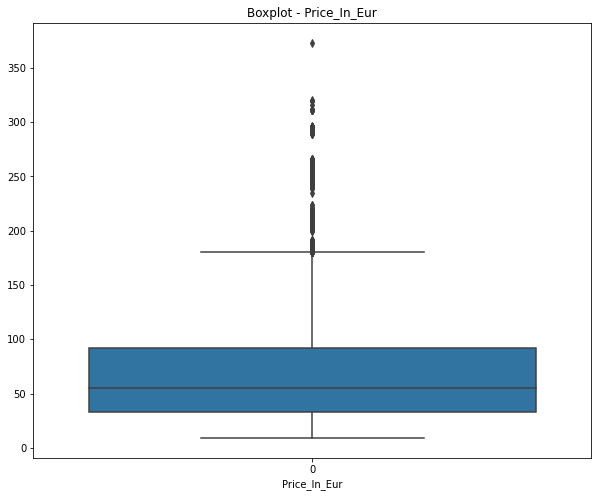

In [36]:
# Boxplot für das Feature "Price_In_Eur" in Trainingsdatensatz 
plt.figure(figsize=(10, 8))
sns.boxplot(data=data_training['Price_In_Eur'])
plt.title('Boxplot - Price_In_Eur')
plt.xlabel('Price_In_Eur')
plt.show()


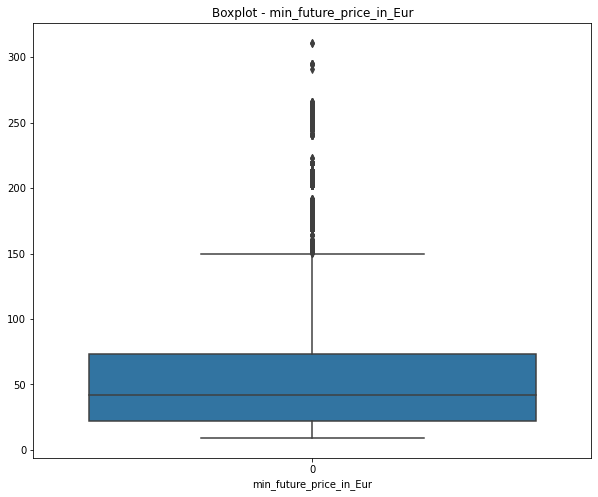

In [37]:
# Boxplot für das Feature "min_future_price_in_Eur" in Trainingsdatensatz 
plt.figure(figsize=(10, 8))
sns.boxplot(data=data_training['min_future_price_in_Eur'])
plt.title('Boxplot - min_future_price_in_Eur')
plt.xlabel('min_future_price_in_Eur')
plt.show()


Korrelationen zwischen Merkmalen im Trainingsdatensatz:
                         Departure_hour  Price_In_Eur  \
Departure_hour                 1.000000      0.092180   
Price_In_Eur                   0.092180      1.000000   
min_future_price_in_Eur        0.083496      0.894554   
buy                           -0.000522     -0.038199   

                         min_future_price_in_Eur       buy  
Departure_hour                          0.083496 -0.000522  
Price_In_Eur                            0.894554 -0.038199  
min_future_price_in_Eur                 1.000000  0.197882  
buy                                     0.197882  1.000000  


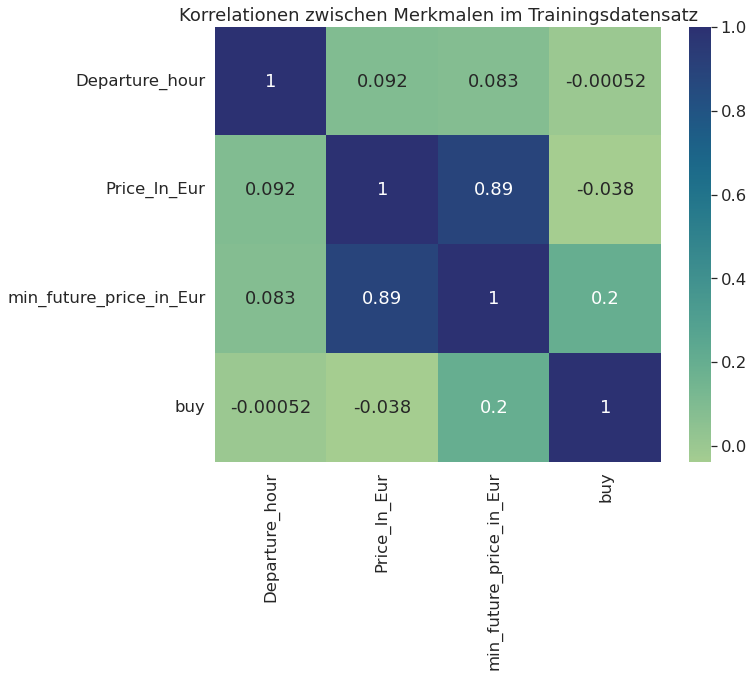

In [50]:
# Korrelationen zwischen Merkmalen im Trainingsdatensatz anzeigen
print("\nKorrelationen zwischen Merkmalen im Trainingsdatensatz:")
correlation_train = data_training.corr()
print(correlation_train)

# Korrelationsmatrix als Heatmap darstellen
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_train, annot=True, cmap='crest')
plt.title('Korrelationen zwischen Merkmalen im Trainingsdatensatz')
plt.show()

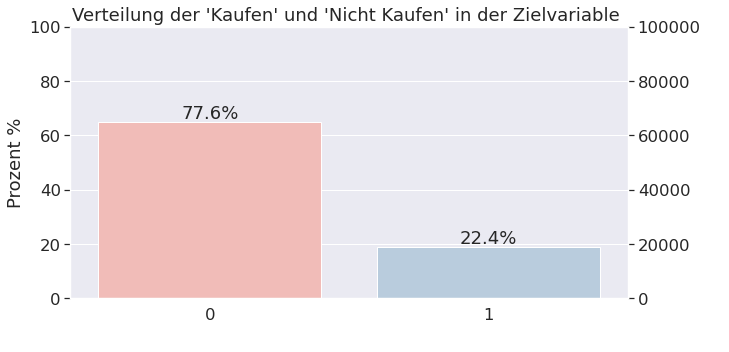

In [51]:
# Verteilung der Defaulters in der Zielvariable in Traningdatensatz

def default():
    ncount = len(data_training)

    ax2=ax.twinx()

    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')

    ax2.set_ylabel('Prozent %')
    plt.title("Verteilung der 'Kaufen' und 'Nicht Kaufen' in der Zielvariable ")

    for i in ax.patches:
        x=i.get_bbox().get_points()[:,0]
        y=i.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom')

    ax2.set_ylim(0,100)
    ax2.grid(None)

ax = sns.countplot(x=data_training.buy, palette="Pastel1")
sns.set(font_scale=1.5)
ax.set_ylim(top=100000)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=100000)

default()

plt.show()


In [52]:
# Deskriptive Statistiken für den Testdatensatz anzeigen
print("\nDeskriptive Statistiken für den Testdatensatz:")
print(data_testing['Price_In_Eur'].describe())


Deskriptive Statistiken für den Testdatensatz:
count    5583.000000
mean       93.630210
std        64.511597
min         9.990000
25%        44.500000
50%        73.430000
75%       126.470000
max       295.890000
Name: Price_In_Eur, dtype: float64


In [ ]:
# Boxplot für das Feature "Price_In_Eur" in Testdatensatz 
plt.figure(figsize=(10, 8))
sns.boxplot(data=data_testing['Price_In_Eur'])
plt.title('Boxplot - Price_In_Eur')
plt.xlabel('Price_In_Eur')
plt.show()


Korrelationen zwischen Merkmalen im Testdatensatz:
                   index  Departure_hour  Price_In_Eur
index           1.000000       -0.007409     -0.068543
Departure_hour -0.007409        1.000000      0.000955
Price_In_Eur   -0.068543        0.000955      1.000000


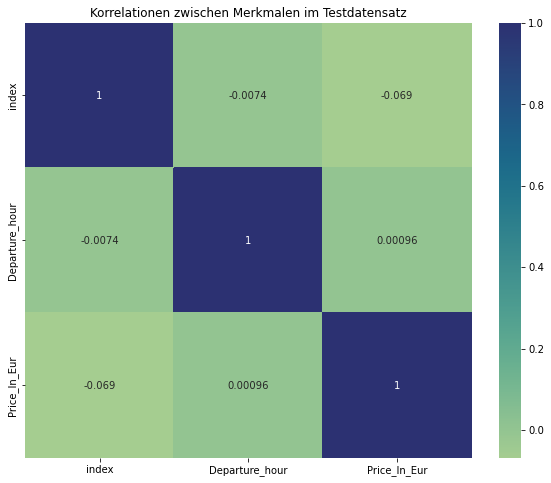

In [41]:

# Korrelationen zwischen Merkmalen im Testdatensatz anzeigen
print("\nKorrelationen zwischen Merkmalen im Testdatensatz:")
correlation_test = data_testing.corr()
print(correlation_test)

# Korrelationsmatrix als Heatmap darstellen
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_test, annot=True, cmap='crest')
plt.title('Korrelationen zwischen Merkmalen im Testdatensatz')
plt.show()


Für das Projekt "Kaufen oder Warten" sind folgende Merkmale (Features) relevant:

- Request_Date: Datum/Zeit der Preisanfrage
- Flight_Date: Datum des Flugs
- Departure_hour: Gerundete Abflugszeit
- flight_unique_id: Eindeutige ID für den Flug
- route_abb: Abkürzung der Route (London Stansted - Berlin Schönefeld oder London Stansted - Frankfurt)
- Price_In_Eur: Flugpreis
- min_future_price_in_Eur: Minimaler Flugpreis für die flight_unique_id über alle zukünftigen Request_Dates (kann als zusätzliches Merkmal betrachtet werden)

Basierend auf diesen vorhandenen Merkmalen können weitere abgeleitete Merkmale definiert werden:

- Time_Until_Flight: Zeitdauer bis zum Flug in Tagen (berechnet als Flight_Date - Request_Date)
- Day_of_Week: Wochentag des Flugs (Montag bis Sonntag)
- Month: Monat des Flugs (Januar bis Dezember)
- Year: Jahr des Flugs


Zusätzlich zu den vorhandenen Merkmalen können externe Informationen berücksichtigt werden, um weitere relevante Merkmale abzuleiten:

- Feiertage: Ein binäres Merkmal, das angibt, ob der Flug an einem Feiertag stattfindet.
- Saison: Ein Merkmal, das die Saison des Jahres (Frühling, Sommer, Herbst, Winter) basierend auf dem Flugdatum angibt.
- Wetterbedingungen: Informationen über das Wetter an den Abflug- und Ankunftsorten können als Merkmale einbezogen werden, um potenzielle Auswirkungen auf die Flugpreise zu berücksichtigen.

Diese zusätzlichen Merkmale könnten helfen, Muster und Zusammenhänge zwischen den Flugpreisen und verschiedenen Faktoren wie Datum, Uhrzeit, Strecke und externen Einflüssen zu identifizieren.
